In [6]:
import tensorflow as tf

In [7]:
import tensorflow.keras
tf.keras.__version__

'2.2.4-tf'

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify 
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this 
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will 
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you! 
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [9]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1260s 110us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [10]:
train_images.shape

(60000, 28, 28)

In [26]:
#print(train_images.ndim)
print(train_images.dtype)

float32


In [11]:
len(train_labels)

60000

In [12]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
len(test_labels)

10000

In [15]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))


The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some 
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully 
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers 
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a 
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.




神经网络的核心组件是层 （layer），它是一种数据处理模块，你可以将它看成数据过滤器。进去一些数据，出来的数据变得更加有用。具体来说，层从输入数据中提取表示 ——我们期望这种表示有助于解决手头的问题。大多数深度学习都是将简单的层链接起来，从而实现渐进式的数据蒸馏 （data distillation）。深度学习模型就像是数据处理的筛子，包含一系列越来越精细的数据过滤器（即层）。

本例中的网络包含 2 个 Dense 层，它们是密集连接（也叫全连接 ）的神经层。第二层（也是最后一层）是一个 10 路 softmax 层，它将返回一个由 10 个概率值（总和为 1）组成的数组。每个概率值表示当前数字图像属于 10 个数字类别中某一个的概率。

要想训练网络，我们还需要选择编译 （compile）步骤的三个参数。

* 损失函数 （loss function）：网络如何衡量在训练数据上的性能，即网络如何朝着正确的方向前进。
* 优化器 （optimizer）：基于训练数据和损失函数来更新网络的机制。
* 在训练和测试过程中需要监控的指标 （metric）：本例只关心精度，即正确分类的图像所占的比例。

后续两章会详细解释损失函数和优化器的确切用途。

In [17]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [18]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels, a step which we explain in chapter 3:

我们还需要对标签进行分类编码

In [20]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

我们现在准备训练我们的网络，在Keras通过调用网络的“fit”方法来完成：我们将模型“拟合”到其训练数据中。

In [21]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2558 - accuracy: 0.9262
Epoch 2/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1043 - accuracy: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0683 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0487 - accuracy: 0.9856
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0370 - accuracy: 0.9887


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

训练过程中显示了两个数字：一个是网络在训练数据上的损失（loss ），另一个是网络在训练数据上的精度（acc ）.

我们很快就在训练数据上达到了 0.989（98.9%）的精度。现在我们来检查一下模型在测试集上的性能.

In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0644 - accuracy: 0.9815


In [23]:
print('test_acc:', test_acc)

test_acc: 0.9815



Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really 
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which 
layers are made of, and about gradient descent, which allows our network to learn from its training examples.


测试集精度为 97.8%，比训练集精度低不少。训练精度和测试精度之间的这种差距是过拟合 （overfit）造成的。过拟合是指机器学习模型在新数据上的性能往往比在训练数据上要差，它是第 3 章的核心主题。

第一个例子到这里就结束了。你刚刚看到了如何构建和训练一个神经网络，用不到 20 行的 Python 代码对手写数字进行分类。下一章会详细介绍这个例子中的每一个步骤，并讲解其背后的原理。接下来你将要学到张量（输入网络的数据存储对象）、张量运算（层的组成要素）和梯度下降（可以让网络从训练样本中进行学习）。

In [30]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print(train_images.ndim)

3


In [32]:
print(train_images.shape)

(60000, 28, 28)


In [33]:
print(train_images.dtype)

uint8


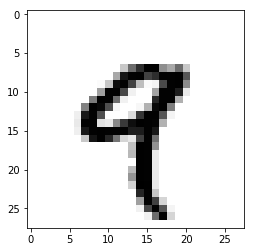

In [36]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

在前面的例子中，我们使用语法 train_images[i] 来选择 沿着第一个轴的特定数字。选择张量的特定元素叫作张量切片 （tensor slicing）。我们来看一下 Numpy 数组上的张量切片运算。

下面这个例子选择第 10~100 个数字（不包括第 100 个），并将其放在形状为 (90, 28, 28) 的数组中。

In [37]:
my_slice = train_images[10:100]

In [38]:
print(my_slice.shape)

(90, 28, 28)


一般来说，你可以沿着每个张量轴在任意两个索引之间进行选择。例如，你可以在所有图像的右下角选出 14 像素×14 像素的区域

In [39]:
my_slice = train_images[:,14:,14:]

也可以使用负数索引。与 Python 列表中的负数索引类似，它表示与当前轴终点的相对位置。你可以在图像中心裁剪出 14 像素×14 像素的区域

In [40]:
my_slice = train_images[:, 7:-7, 7:-7]

In [42]:
batch  = train_images[:128]

In [44]:
batch = train_images[128:256]

In [46]:
#batch = train_images[128 * n:128 * (n + 1)]